In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
df.shape

(569, 31)

In [22]:
per_data = {}
for cols in df.iloc[:,:-1].columns:
    per_data[f'{cols}_75'] = df[cols].quantile(0.75)
    per_data[f'{cols}_25'] = df[cols].quantile(0.25)

In [23]:
print(per_data)

{'mean radius_75': np.float64(15.78), 'mean radius_25': np.float64(11.7), 'mean texture_75': np.float64(21.8), 'mean texture_25': np.float64(16.17), 'mean perimeter_75': np.float64(104.1), 'mean perimeter_25': np.float64(75.17), 'mean area_75': np.float64(782.7), 'mean area_25': np.float64(420.3), 'mean smoothness_75': np.float64(0.1053), 'mean smoothness_25': np.float64(0.08637), 'mean compactness_75': np.float64(0.1304), 'mean compactness_25': np.float64(0.06492), 'mean concavity_75': np.float64(0.1307), 'mean concavity_25': np.float64(0.02956), 'mean concave points_75': np.float64(0.074), 'mean concave points_25': np.float64(0.02031), 'mean symmetry_75': np.float64(0.1957), 'mean symmetry_25': np.float64(0.1619), 'mean fractal dimension_75': np.float64(0.06612), 'mean fractal dimension_25': np.float64(0.0577), 'radius error_75': np.float64(0.4789), 'radius error_25': np.float64(0.2324), 'texture error_75': np.float64(1.474), 'texture error_25': np.float64(0.8339), 'perimeter error_7

In [24]:
IQR = {}
for cols  in df.iloc[:,:-1].columns:
    IQR[f'{cols}_IQR']  = per_data[f'{cols}_75'] - per_data[f'{cols}_25']

In [25]:
upper_lower = {}
for cols in df.iloc[:,:-1].columns:
    upper_lower[f'{cols}_upper']  = per_data[f'{cols}_75'] + 1.5* IQR[f'{cols}_IQR']
    upper_lower[f'{cols}_lower'] =  per_data[f'{cols}_25'] -  1.5* IQR[f'{cols}_IQR']

In [26]:
for cols in df.iloc[:,:-1].columns:
    df[f'{cols}'] = np.where(
        df[f'{cols}'] > upper_lower[f'{cols}_upper'],
        upper_lower[f'{cols}_upper'],
        np.where(
            df[f'{cols}'] < upper_lower[f'{cols}_lower'],
            upper_lower[f'{cols}_lower'],
            df[f'{cols}'])
        )

In [27]:
IQR

{'mean radius_IQR': np.float64(4.08),
 'mean texture_IQR': np.float64(5.629999999999999),
 'mean perimeter_IQR': np.float64(28.929999999999993),
 'mean area_IQR': np.float64(362.40000000000003),
 'mean smoothness_IQR': np.float64(0.018930000000000002),
 'mean compactness_IQR': np.float64(0.06547999999999998),
 'mean concavity_IQR': np.float64(0.10114000000000001),
 'mean concave points_IQR': np.float64(0.053689999999999995),
 'mean symmetry_IQR': np.float64(0.033800000000000024),
 'mean fractal dimension_IQR': np.float64(0.008419999999999997),
 'radius error_IQR': np.float64(0.2465),
 'texture error_IQR': np.float64(0.6401),
 'perimeter error_IQR': np.float64(1.7510000000000001),
 'area error_IQR': np.float64(27.339999999999996),
 'smoothness error_IQR': np.float64(0.0029770000000000005),
 'compactness error_IQR': np.float64(0.01937),
 'concavity error_IQR': np.float64(0.026959999999999998),
 'concave points error_IQR': np.float64(0.007072000000000001),
 'symmetry error_IQR': np.float6

In [28]:
df[df['mean area']  > upper_lower['mean area_upper']]
# df[df['mean area']  <  lower_limit]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [29]:
X = df.drop('target',axis=1)
Y = df['target']

In [30]:
x_train, x_test , y_train ,y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [31]:
x_train.shape

(455, 30)

C:\Users\arman\AppData\Local\Temp\ipykernel_22480\2662779194.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,4))


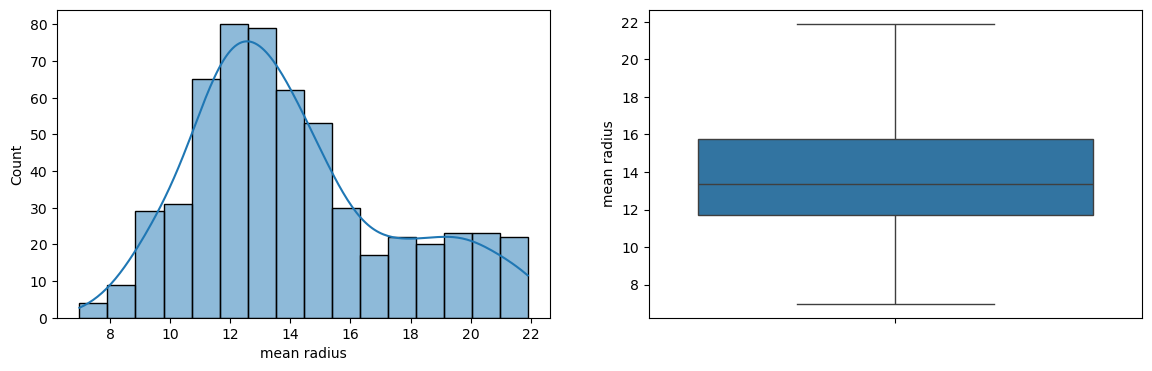

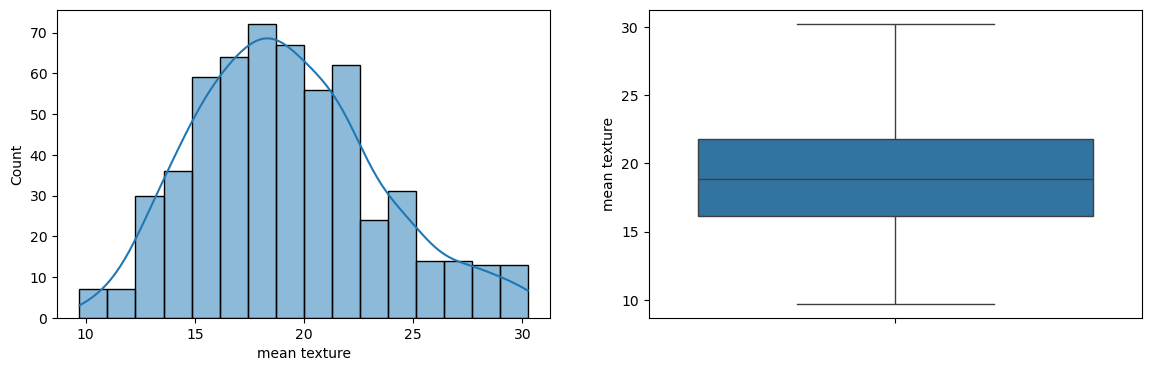

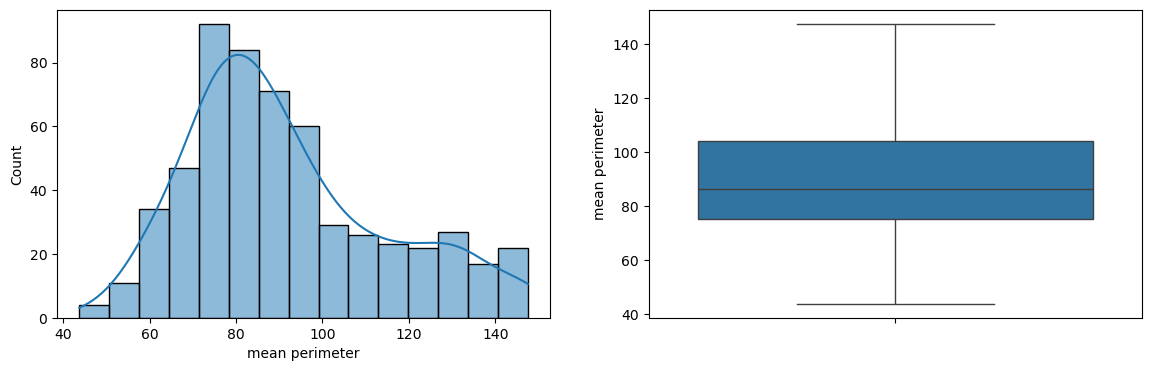

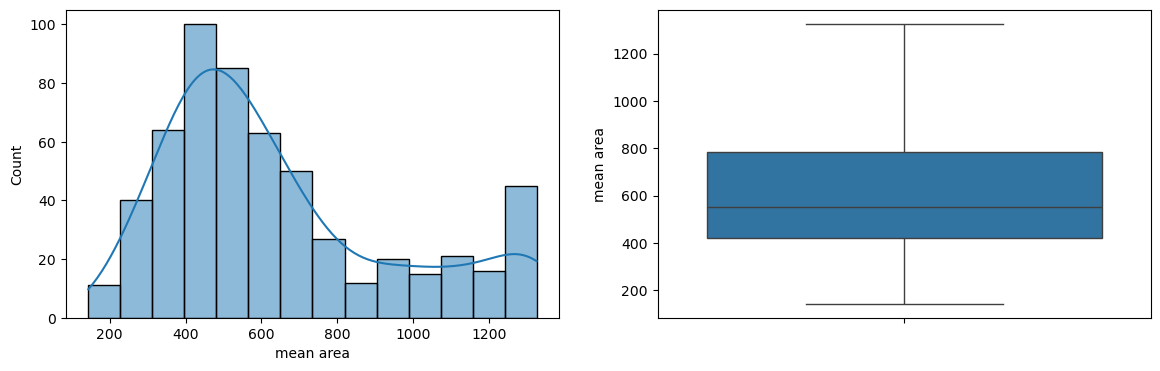

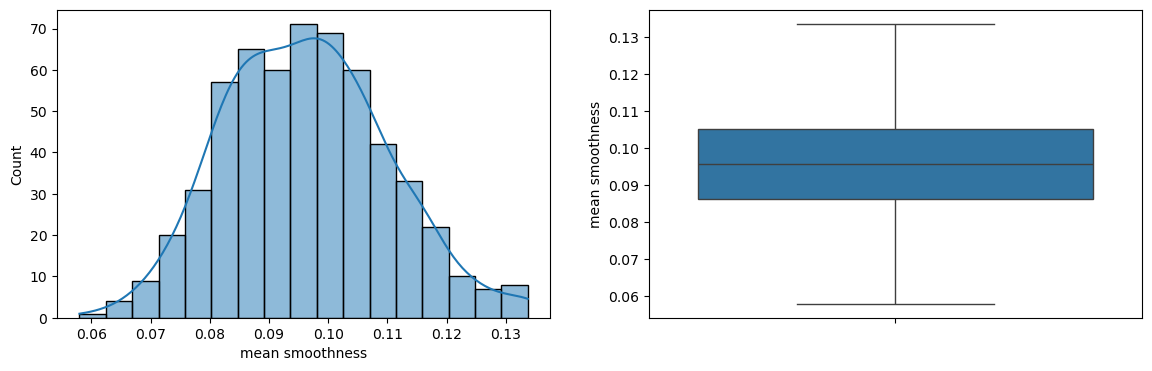

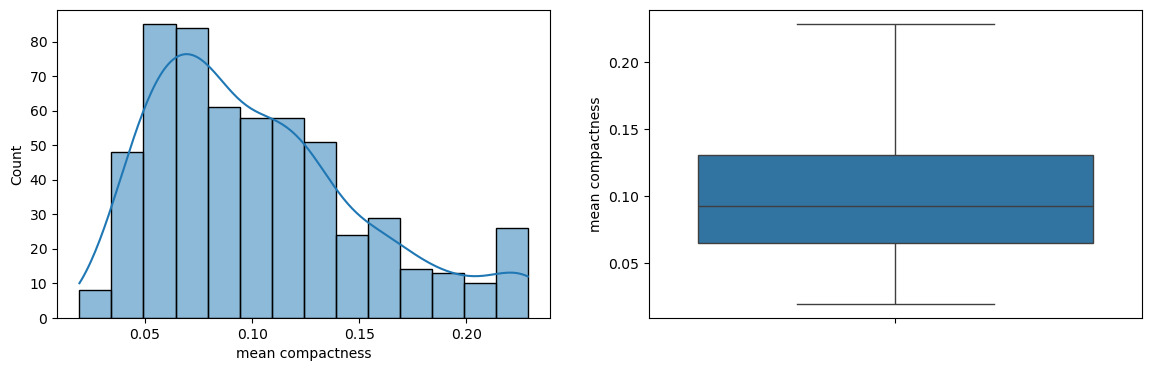

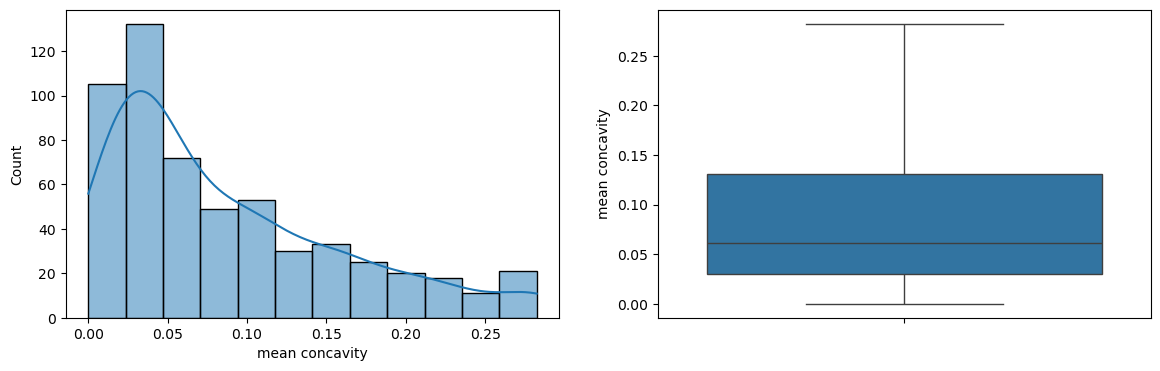

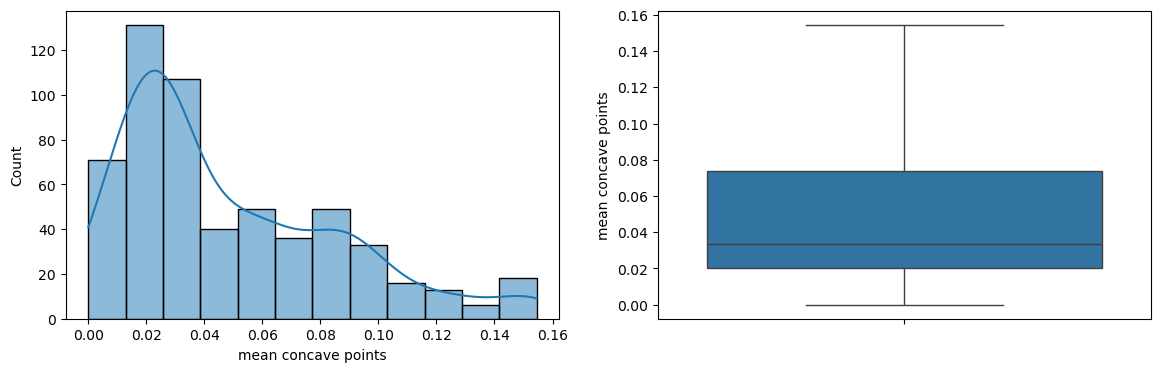

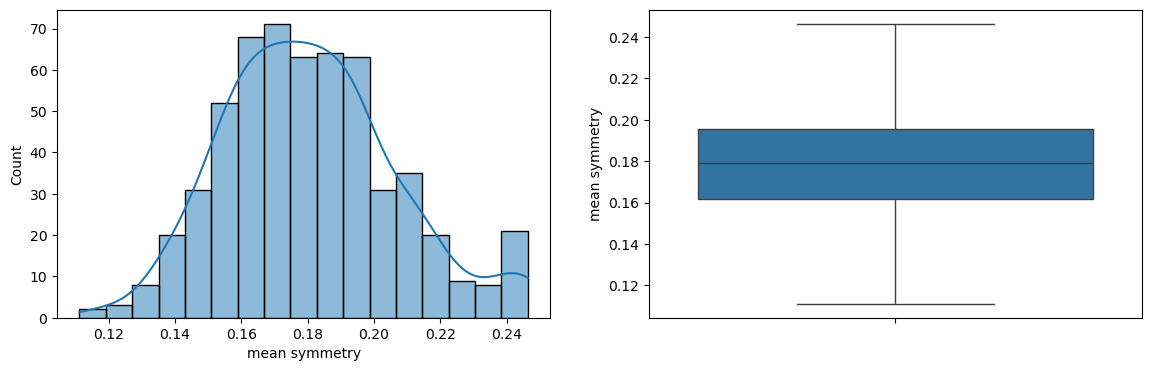

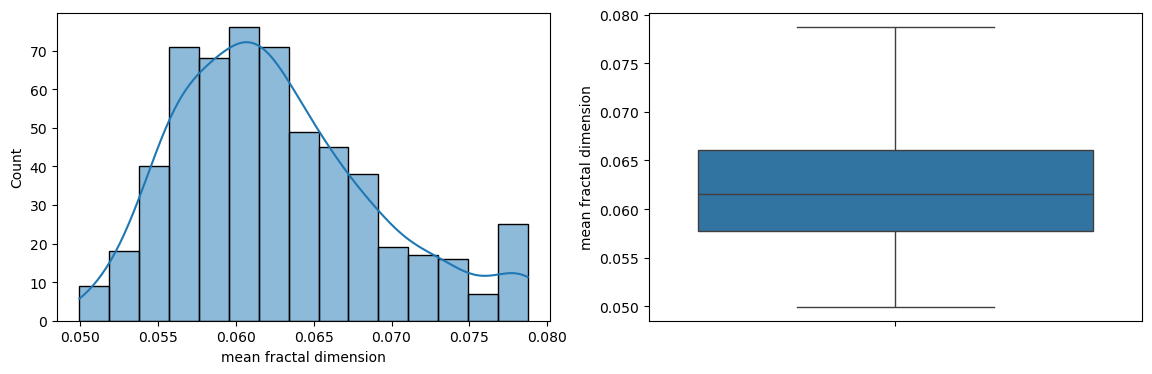

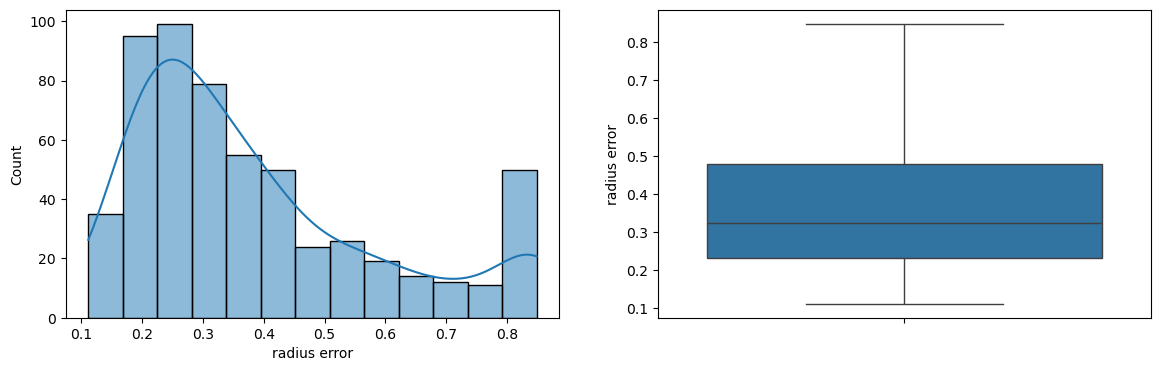

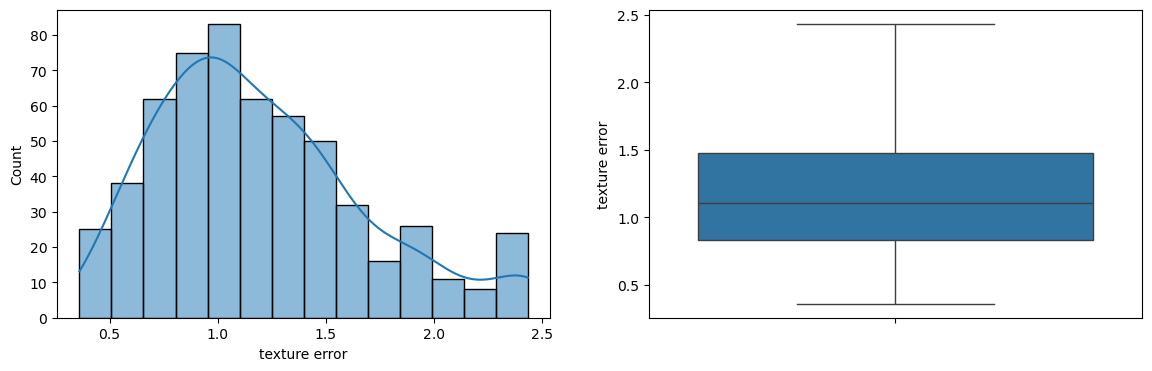

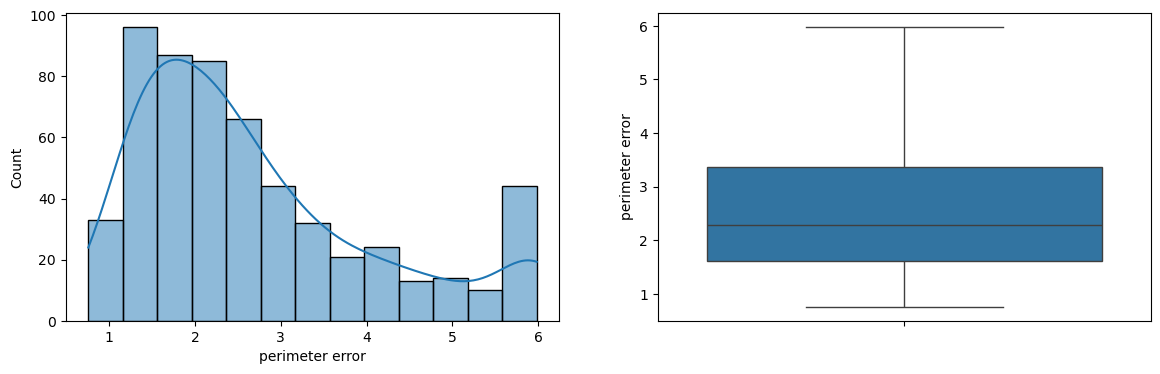

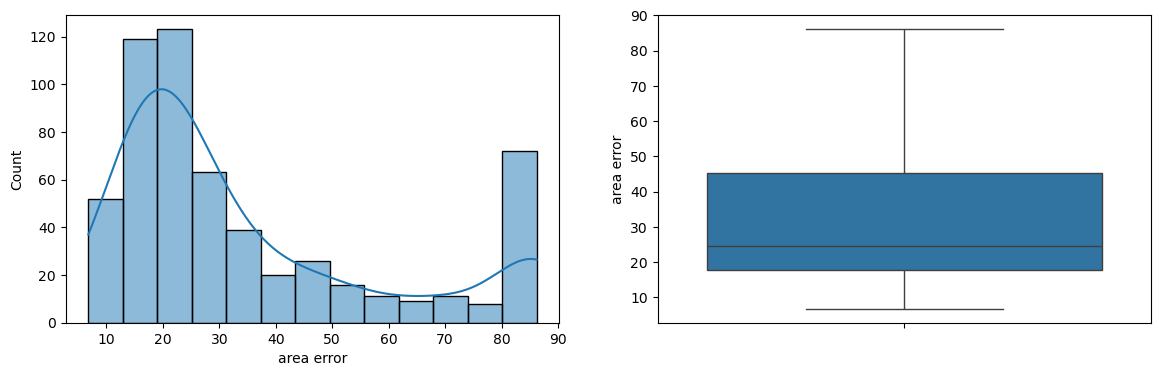

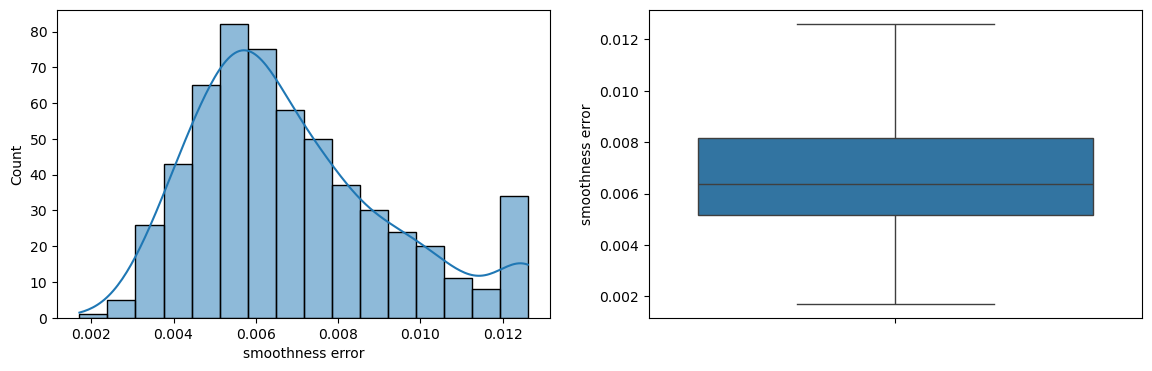

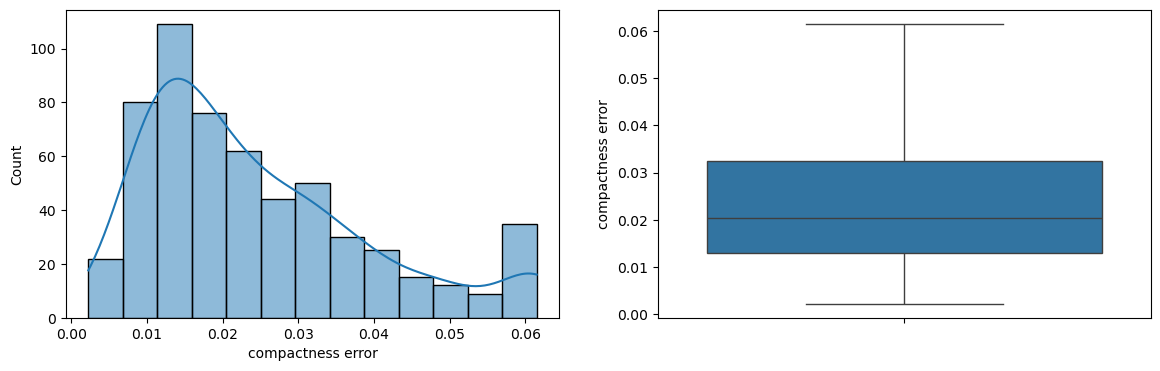

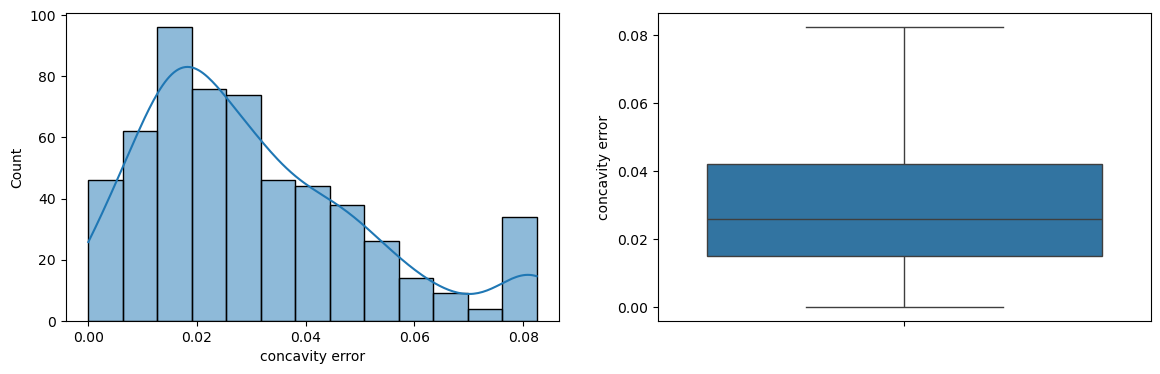

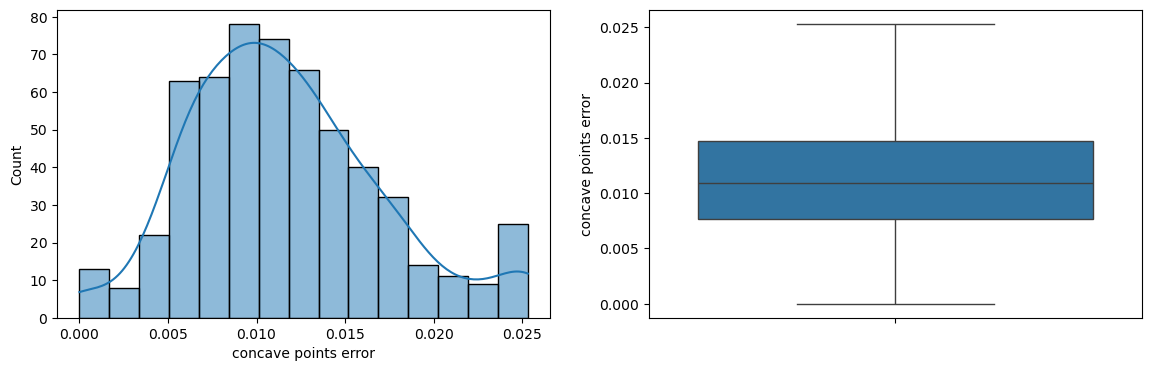

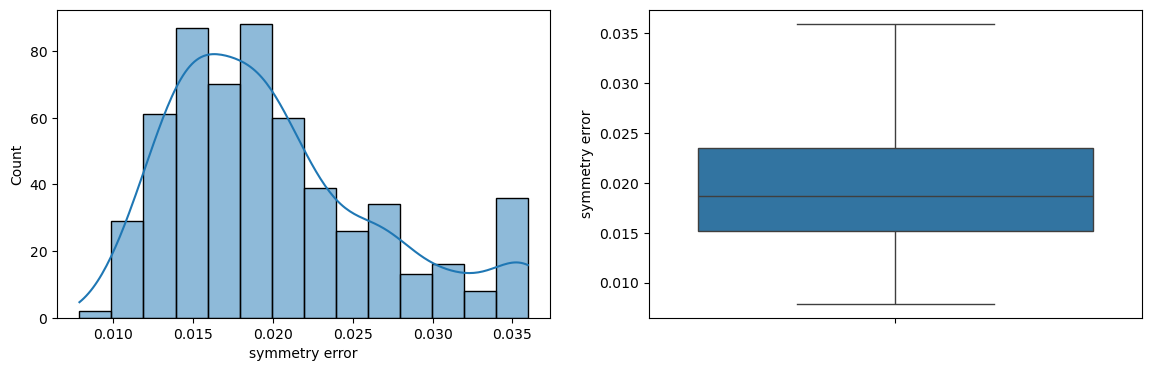

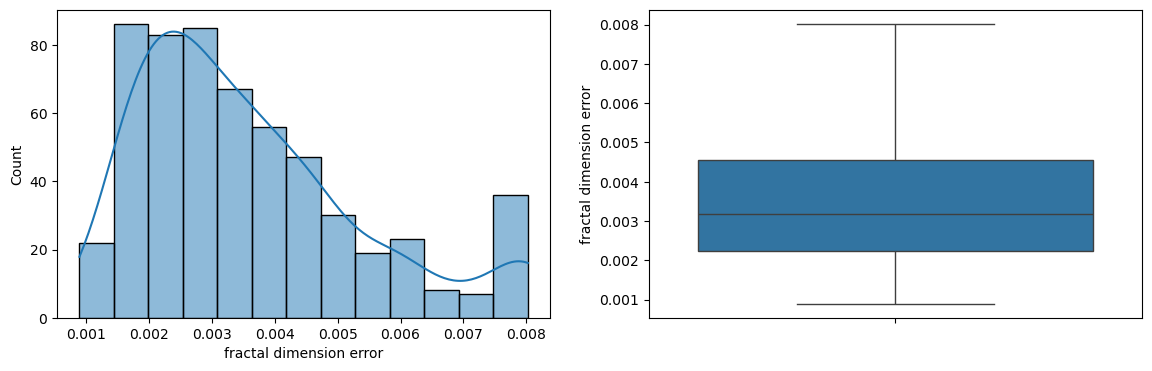

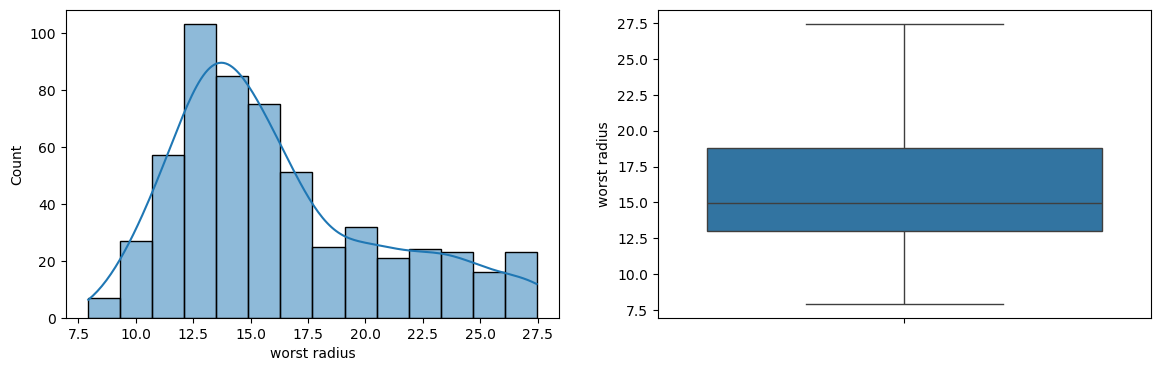

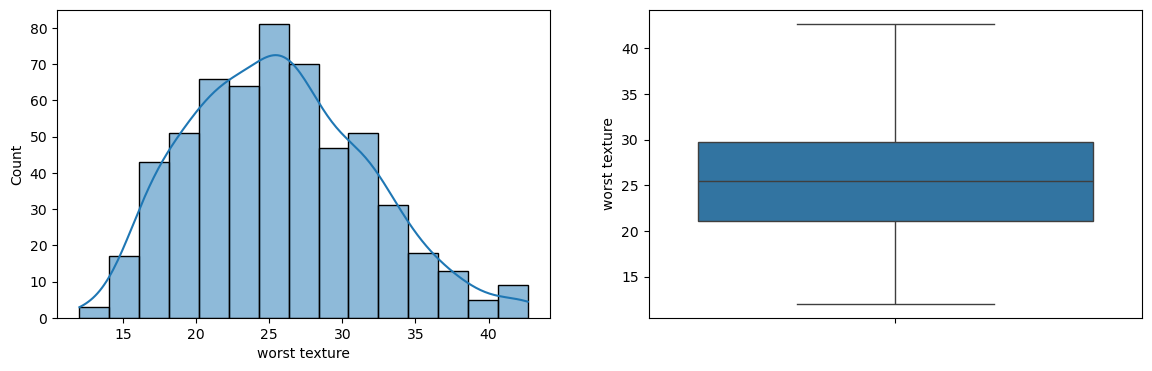

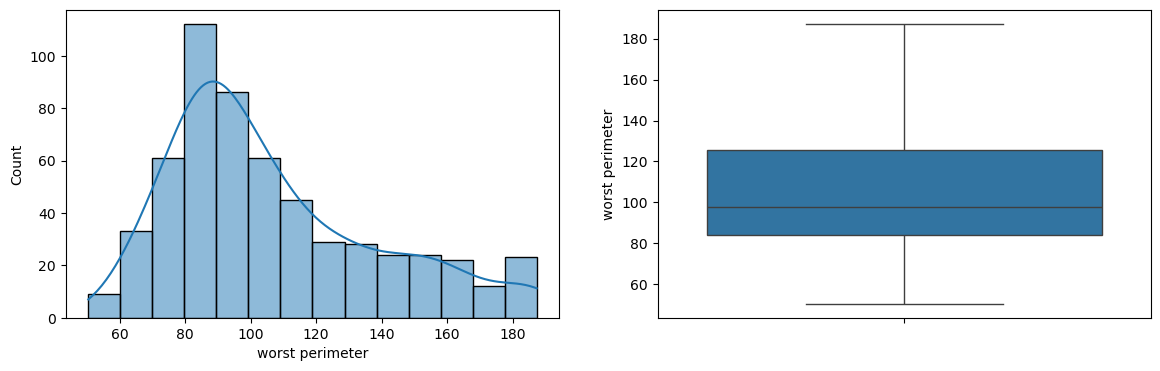

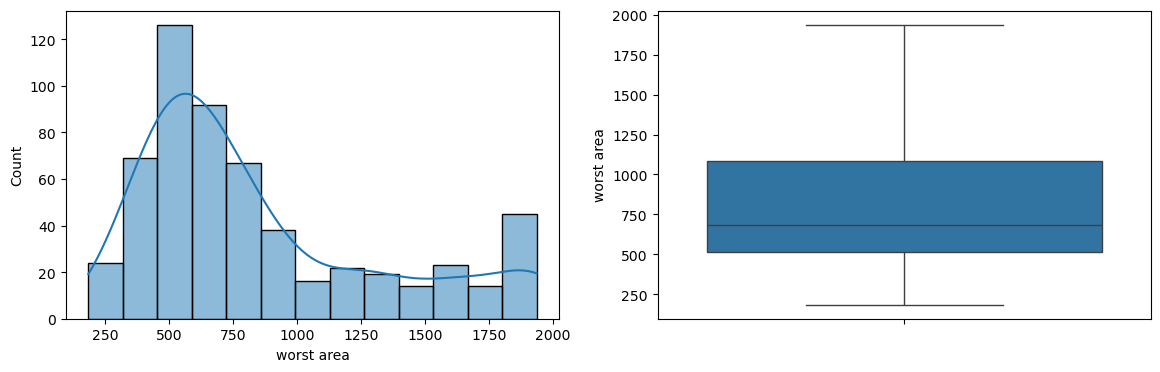

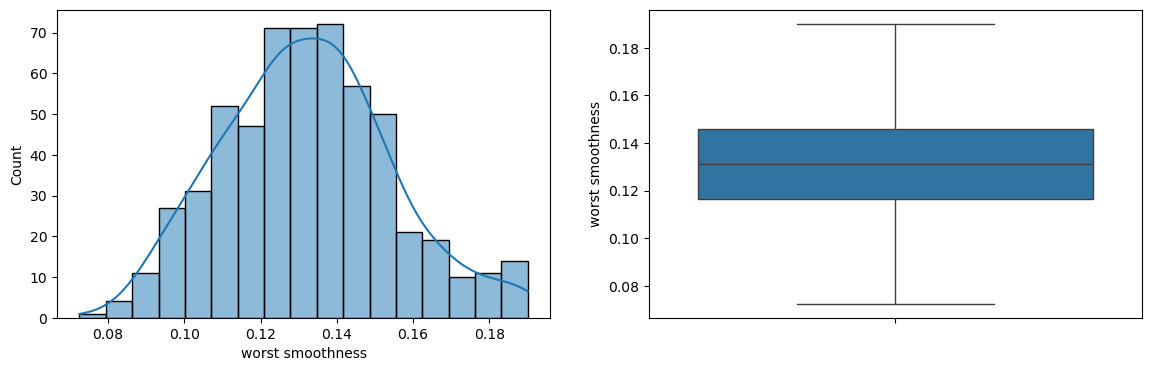

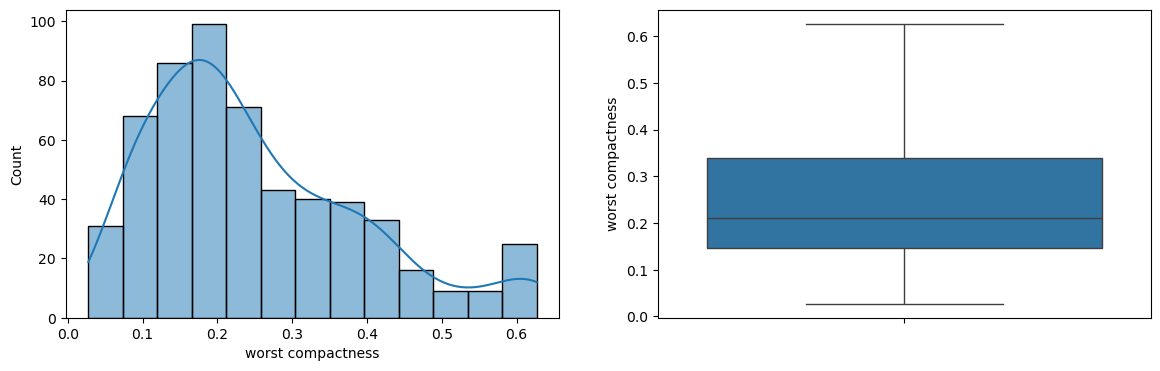

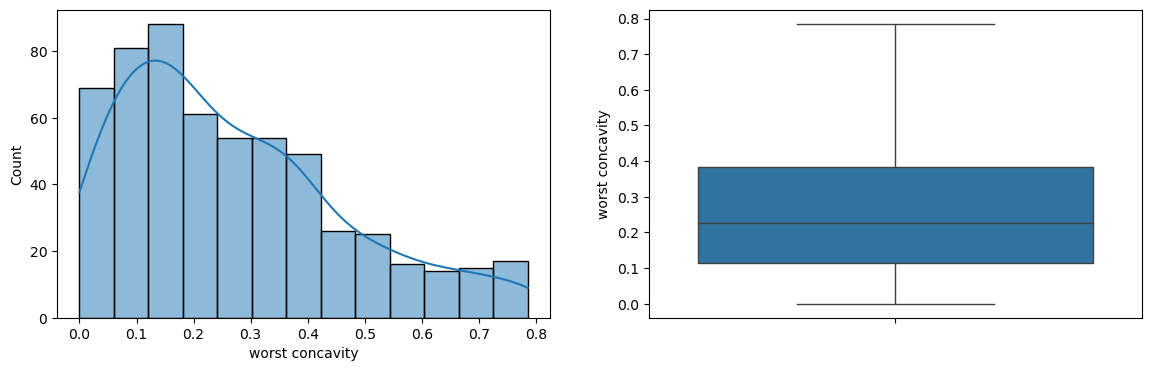

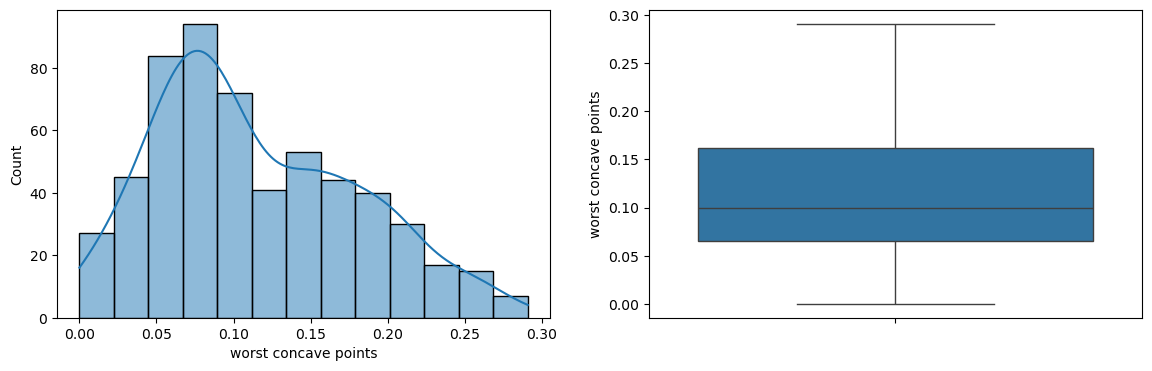

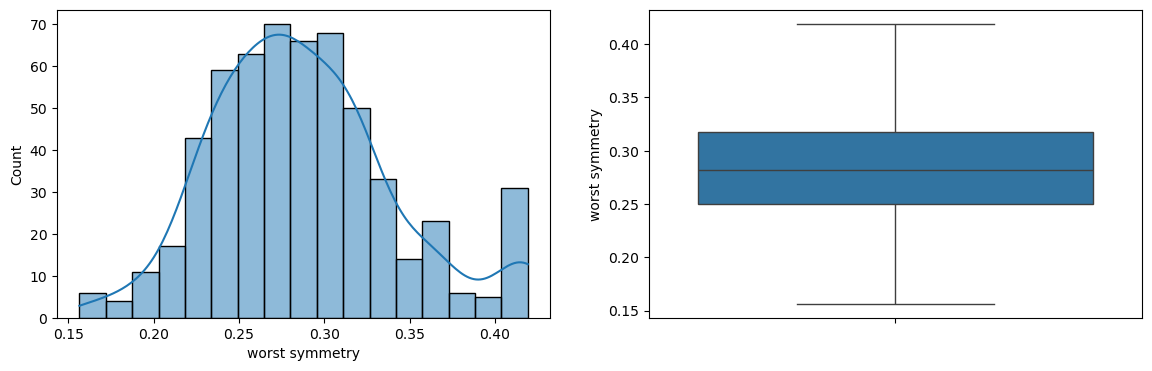

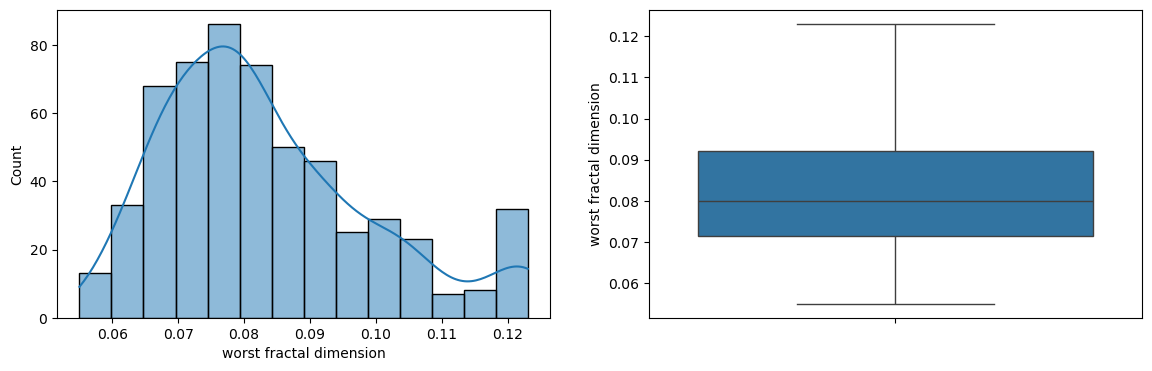

In [32]:
for cols in df.iloc[:,:-1].columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(df[cols], kde=True)
    plt.subplot(122)
    sns.boxplot(df[cols])

In [33]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115,0
565,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637,0
566,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820,0
567,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,...,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301,0


In [34]:
s = StandardScaler()
x_train_s = s.fit_transform(x_train)
x_test_s = s.transform(x_test)



In [35]:
pca = PCA(n_components=7)
x_train_trf = pca.fit_transform(x_train_s)
x_test_trf = pca.transform(x_test_s)

np.cumsum(pca.explained_variance_ratio_)

array([0.4615595 , 0.65557387, 0.74926984, 0.81241282, 0.86323575,
       0.90279831, 0.92256782])

In [36]:
m = LogisticRegression()
m.fit(x_train_trf,y_train)
y_pred = m.predict(x_test_trf)
accuracy_score(y_test , y_pred)

0.9824561403508771